**IMAGE-BASED CLASSIFICATION OF CATS AND DOGS USING SUPPORT VECTOR MACHINE(SVM)**

Support Vector Machines (SVMs) are a type of supervised learning algorithm commonly used for classification and regression tasks. In this project, I will use the SVM technique to classify images of cats and dogs.

Key steps used for classification:
1. Import Libraries

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

2. Load the image and convert it to dataframe

In [ ]:
Categories=['cat','dog']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/dogs-vs-cats (2)/dogs-vs-cats/train'
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... category : cat
loaded category:cat successfully
loading... category : dog
loaded category:dog successfully


The code performs essential steps to prepare image data for machine learning tasks.

It starts by importing necessary libraries:

* scikit-image for image processing,

* pandas for data manipulation,

* numpy for numerical operations.

A Categories list is defined to specify the image classes (e.g., 'cats' and 'dogs').

Two empty arrays are initialized to store:

* Flattened image data,

* Corresponding class labels.

Images are loaded from a specified directory path.

Each image is:

* Read

* Resized to 150x150 pixels with 3 color channels (RGB),

* Flattened into a 1D array.

The processed image data and its label (0 for 'cats', 1 for 'dogs') are appended to the arrays.

These arrays are converted into a pandas DataFrame.

The DataFrame is then split into:

* Input features x (all columns except the last),

* Output labels y (the last column).

The x and y datasets are ready to be used for training a machine learning model.

The code uses clear and meaningful variable names, making it easy to follow and understand.

Overall, the code efficiently loads, processes, and organizes image data for ML training.












In [ ]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(4000, 67501)

3. Separate input features and targets

In [ ]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

4. Splitting data into training and testing

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)

5. Build and Train model using svm

In [ ]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

* The code defines a parameter grid for GridSearchCV to perform hyperparameter tuning.

* The grid includes the following hyperparameters:

     * C: Penalty parameter of the error term.

     * gamma: Kernel coefficient for certain kernels.

     * kernel: Specifies the type of SVM kernel (e.g., 'linear', 'rbf').

* A range of values is provided for each hyperparameter to explore multiple combinations.

* GridSearchCV performs an exhaustive search over all possible combinations in the grid to identify the best-performing parameters.

* An SVM classifier is created with probability=True to enable the use of the predict_proba() method for class probability estimates.

* The SVM model and parameter grid are passed into GridSearchCV to initiate the search process.

* GridSearchCV evaluates each combination using cross-validation to measure model performance.

* The goal is to identify the hyperparameters that yield the highest accuracy for the model.

* This tuning process ensures the best possible performance from the SVM classifier.

6. Model Evaluation

In [ ]:
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 52.37500000000001% accurate


Classification report function from scikit-learn to generate a classification report for your SVM model.

In [ ]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       0.52      0.57      0.55       400
         dog       0.53      0.47      0.50       400

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800



In [ ]:
from sklearn.svm import SVC

# Enable probability estimation
model = SVC(kernel='rbf', probability=True)

# Train the model
model.fit(x_train, y_train)

# Now you can safely use predict_proba
y_probs = model.predict_proba(x_test)

This code builds and trains an SVM classifier using the RBF kernel, enables probability prediction, and uses it to estimate class probabilities on unseen test data.

7. Prediction

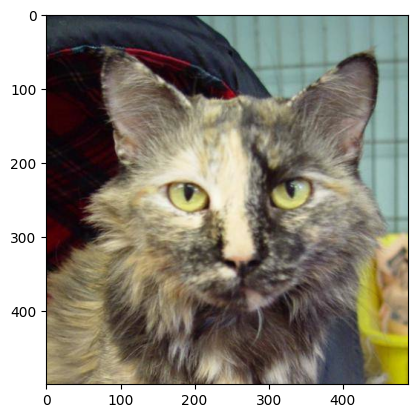

cat = 58.371759007141435%
dog = 41.62824099285856%
The predicted image is : cat


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/cat/cat.10.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

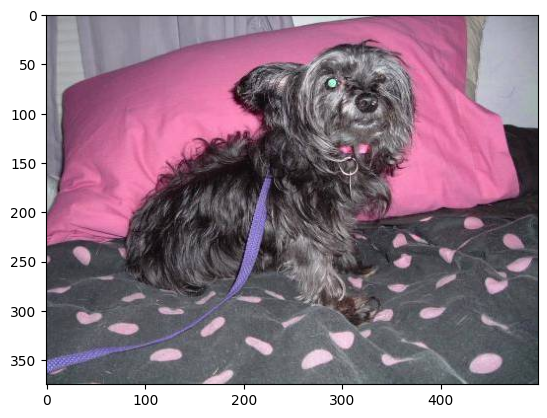

cat = 22.76272944177853%
dog = 77.23727055822147%
The predicted image is : dog


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/dog/dog.0.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

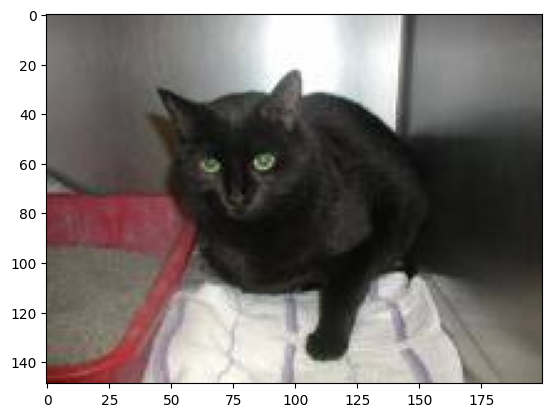

cat = 86.20023504357498%
dog = 13.799764956425054%
The predicted image is : cat


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/cat/cat.274.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

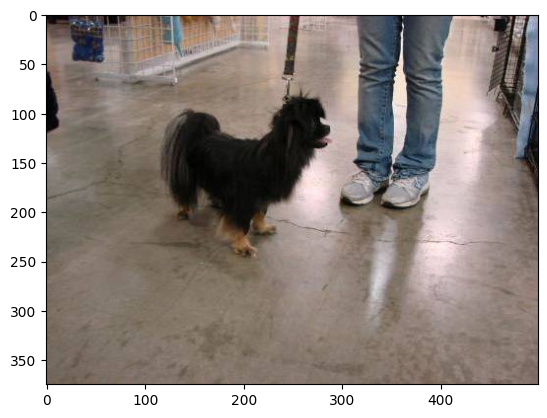

cat = 22.75735938932381%
dog = 77.2426406106762%
The predicted image is : dog


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/dog/dog.1000.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

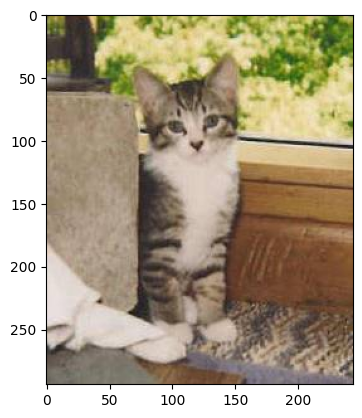

cat = 51.7207212588659%
dog = 48.2792787411341%
The predicted image is : cat


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/cat/cat.277.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

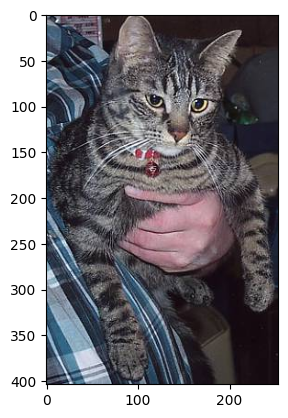

cat = 61.780396832396136%
dog = 38.219603167603864%
The predicted image is : cat


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/cat/cat.268.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

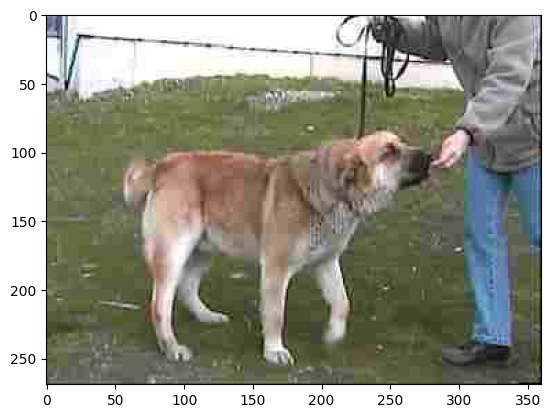

cat = 22.756579753009415%
dog = 77.24342024699058%
The predicted image is : dog


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/dog/dog.1010.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

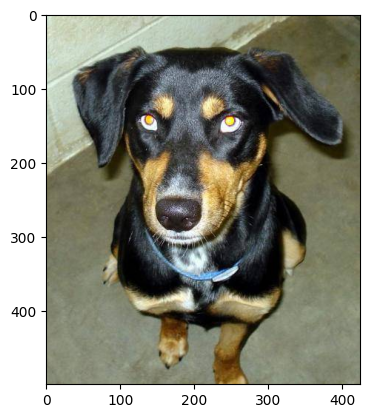

cat = 20.87848957109862%
dog = 79.1215104289014%
The predicted image is : dog


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/dog/dog.1025.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

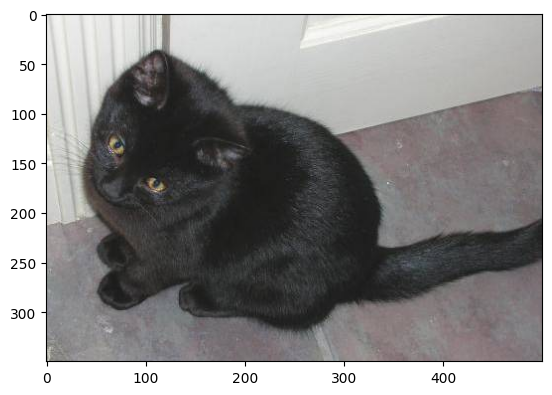

cat = 81.95204986309035%
dog = 18.04795013690967%
The predicted image is : cat


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/cat/cat.177.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

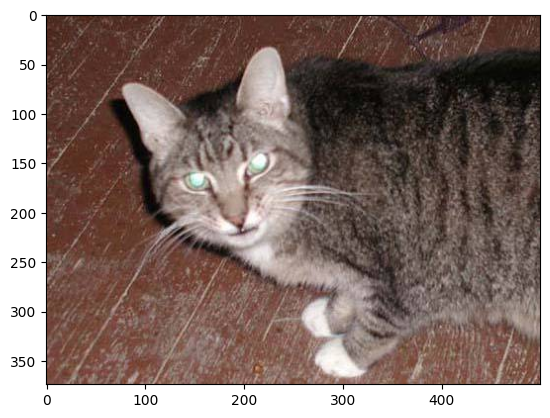

cat = 65.17297450031143%
dog = 34.82702549968857%
The predicted image is : cat


In [ ]:
path='/content/dogs-vs-cats (2)/dogs-vs-cats/train/cat/cat.1743.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

Conclusion:

The goal of this article was to create and train a Support Vector Machine (SVM) model to accurately classify images of cats and dogs. The best parameters for the SVM model were determined using GridSearchCV, and the model's accuracy was measured.

